In [0]:
!unzip "/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv.zip" -d "/content/drive/My Drive/Colab Notebooks/NLP mini project/"

Archive:  /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv.zip
  inflating: /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv  


In [0]:
!unzip "/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv.zip" -d "/content/drive/My Drive/Colab Notebooks/NLP mini project/"

Archive:  /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv.zip
  inflating: /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv  


In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv")

In [0]:
df_train.shape

(1490, 3)

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [0]:
df_train.drop(["ArticleId"],axis=1,inplace=True)

In [0]:
set(df_train["Category"])

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [0]:
df_train["labels"] = df_train["Category"].map({"business":0,"entertainment":1,"politics":2,"sport":3,"tech":4})

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(df_train["Text"],df_train["labels"],test_size=0.3, random_state=0)

In [0]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((1043,), (447,), (1043,), (447,))

In [0]:
set(Y_train)

{0, 1, 2, 3, 4}

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
MAX_NO_OF_UNIQUE_WORDS = 30000
tokenizer = Tokenizer(num_words=MAX_NO_OF_UNIQUE_WORDS)
tokenizer.fit_on_texts(X_train)

In [0]:
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [0]:
len_of_seq_train = [ len(s) for s in X_train]
max_len_after_pad_train = max(len_of_seq_train)
print(max_len_after_pad_train)

3356


In [0]:
len_of_seq_val = [ len(s) for s in X_val ]
max_len_after_pad_val = max(len_of_seq_val)
print(max_len_after_pad_val)

1644


In [0]:
MAX_LEN_OF_SEQ = max([max_len_after_pad_train,max_len_after_pad_val])
print(MAX_LEN_OF_SEQ)

3356


In [0]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("no of unique words = ",V)

no of unique words =  21396


In [0]:
X_train = pad_sequences(X_train)
print("Paded shape : ",X_train.shape)
T = X_train.shape[1]

Paded shape :  (1043, 3356)


In [0]:
X_val = pad_sequences(X_val, maxlen=T)
print("Paded shape : ",X_val.shape)

Paded shape :  (447, 3356)


In [0]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [0]:
D = 30

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32,3)(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3)(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(5,activation="softmax")(x)

model = Model(i,x)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3356)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 3356, 30)          641910    
_________________________________________________________________
conv1d (Conv1D)              (None, 3354, 32)          2912      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1118, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1116, 64)          6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 372, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 370, 128)          24704 

In [0]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
r = model.fit(X_train,Y_train, batch_size=16, epochs=10, validation_data=(X_val,Y_val))

Epoch 1/10
66/66 [==============================] - 2s 29ms/step - loss: 1.6068 - accuracy: 0.2244 - val_loss: 1.5943 - val_accuracy: 0.2170
Epoch 2/10
66/66 [==============================] - 2s 27ms/step - loss: 1.4265 - accuracy: 0.4535 - val_loss: 1.0301 - val_accuracy: 0.5817
Epoch 3/10
66/66 [==============================] - 2s 26ms/step - loss: 0.5493 - accuracy: 0.8025 - val_loss: 0.3070 - val_accuracy: 0.9150
Epoch 4/10
66/66 [==============================] - 2s 26ms/step - loss: 0.0598 - accuracy: 0.9895 - val_loss: 0.2073 - val_accuracy: 0.9284
Epoch 5/10
66/66 [==============================] - 2s 26ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1985 - val_accuracy: 0.9329
Epoch 6/10
66/66 [==============================] - 2s 26ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1912 - val_accuracy: 0.9374
Epoch 7/10
66/66 [==============================] - 2s 25ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1922 - val_accuracy: 0.9374
Epoch 8/10
66

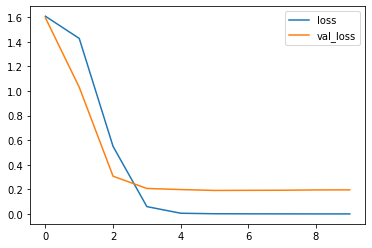

In [0]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

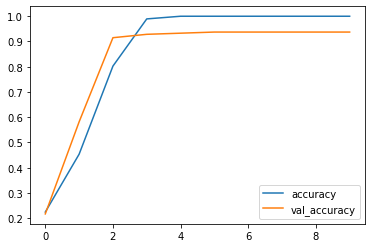

In [0]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [0]:
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv")
X_test = tokenizer.texts_to_sequences(df_test["Text"])
X_test = pad_sequences(X_test, maxlen=T)

In [0]:
X_test.shape

(735, 3356)

In [0]:
res = model.predict(X_test)

In [0]:
res.shape

(735, 5)

In [0]:
res[0]

array([7.2040436e-08, 5.2759396e-03, 3.5199992e-06, 9.9472010e-01,
       3.7521315e-07], dtype=float32)

In [0]:
labels = ["business","entertainment","politics","sport","tech"]
preds = []
for c in res:
  idx = np.argmax(c)
  preds.append(labels[idx])

In [0]:
len(preds)

735

In [0]:
sample_sub = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Sample Solution.csv")

In [0]:
df_test["Category"] = preds

In [0]:
df_new = df_test.drop(["Text"],axis=1)

In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
 2   Category   735 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.4+ KB


In [0]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [0]:
df_new.to_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/sub_1.csv",index=False)